## LSTM

In [38]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import csv
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

from keras.layers import Conv1D, Conv2D, MaxPooling2D 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np



from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np




## Define Functions 

In [39]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
    
    
#To Sequence
import numpy as np

def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)



    


In [40]:
preprocess = True

filename_read = os.path.join("CSC215_P2_Stock_Price.csv")
df_LSTM = pd.read_csv(filename_read)


df_LSTM_new=df_LSTM.drop(['Date', 'Adj_Close'], axis=1)

df_close_lstm = df_LSTM_new['Close']

scaler = MinMaxScaler(feature_range=(0,1))
df_LSTM_new = scaler.fit_transform(df_LSTM_new)


percent70 = int(len(df_LSTM_new)* 0.70)
percent30 = len(df_LSTM_new) - percent70
print(percent70)
print(percent30)
      
train = df_LSTM_new[0:percent70]
test = df_LSTM_new[percent70:len(df_LSTM_new)]
print(train.shape)
print(test.shape)

train_close = df_close_lstm[0:percent70].values
test_close =  df_close_lstm[percent70:len(df_close_lstm)].values
print(train_close.shape)
print(test_close.shape)

3074
1318
(3074, 5)
(1318, 5)
(3074,)
(1318,)


In [41]:
SEQUENCE_SIZE = 7

#print(x_train[0:2])
#print("Shape of x_train: {}".format(x_train.shape))
x_train,y_train = to_sequences(SEQUENCE_SIZE,train,train_close)
x_test,y_test = to_sequences(SEQUENCE_SIZE,test,test_close)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 1, 5)
Shape of x_test: (1310, 7, 1, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [42]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[3]))

In [43]:
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 5)
Shape of x_test: (1310, 7, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


### LSTM with 1 dense layer, 1 LSTM layer, dropout, earlystopping

Build model...
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 64)                17920     
Total params: 17,920
Trainable params: 17,920
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 64)                17920     
_________________________________________________________________
dense_71 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 33        
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Model: 

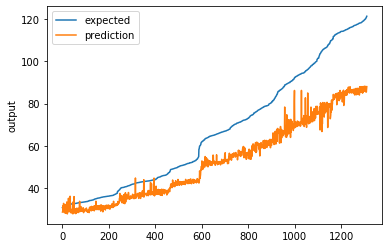

In [44]:
print('Build model...')
model = Sequential()

model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
model.summary()
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.summary() 

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2, epochs=10)  

from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),y_test,sort=True)

### LSTM with 1 dense layer, 1 LSTM layer, dropout, earlystopping, checkpoint

0
Build model...
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 10s - loss: 174.7302 - val_loss: 2757.3720

Epoch 00001: val_loss improved from inf to 2757.37204, saving model to ./best_weights_lstm.hdf5
Epoch 2/10
 - 2s - loss: 28.8025 - val_loss: 742.3157

Epoch 00002: val_loss improved from 2757.37204 to 742.31565, saving model to ./best_weights_lstm.hdf5
Epoch 3/10
 - 3s - loss: 18.9460 - val_loss: 188.0698

Epoch 00003: val_loss improved from 742.31565 to 188.06984, saving model to ./best_weights_lstm.hdf5
Epoch 4/10
 - 3s - loss: 12.5264 - val_loss: 46.4680

Epoch 00004: val_loss improved from 188.06984 to 46.46796, saving model to ./best_weights_lstm.hdf5
Epoch 5/10
 - 3s - loss: 8.9010 - val_loss: 62.9678

Epoch 00005: val_loss did not improve from 46.46796
Epoch 6/10
 - 2s - loss: 7.6172 - val_loss: 66.0461

Epoch 00006: val_loss did not improve from 46.46796
Epoch 7/10
 - 2s - loss: 6.2507 - val_loss: 166.0325

Epoch 00007: val_loss did not improve fro

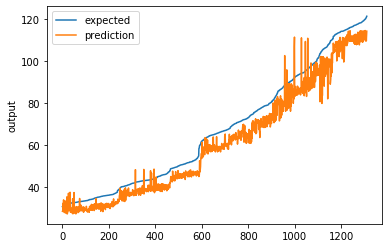

In [45]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

for i in range(2):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm.hdf5')


pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),y_test,sort=True)

### LSTM with 1 dense layer, 2 LSTM layer, dropout, earlystopping, checkpoint

In [65]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

0
Build model...
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 13s - loss: 163.5109 - val_loss: 1059.7814

Epoch 00001: val_loss improved from inf to 1059.78143, saving model to ./best_weights_lstm.hdf5
Epoch 2/10
 - 2s - loss: 28.3435 - val_loss: 391.9618

Epoch 00002: val_loss improved from 1059.78143 to 391.96179, saving model to ./best_weights_lstm.hdf5
Epoch 3/10
 - 2s - loss: 18.3387 - val_loss: 272.2906

Epoch 00003: val_loss improved from 391.96179 to 272.29063, saving model to ./best_weights_lstm.hdf5
Epoch 4/10
 - 2s - loss: 14.5230 - val_loss: 126.1468

Epoch 00004: val_loss improved from 272.29063 to 126.14676, saving model to ./best_weights_lstm.hdf5
Epoch 5/10
 - 2s - loss: 9.4363 - val_loss: 151.5766

Epoch 00005: val_loss did not improve from 126.14676
Epoch 6/10
 - 2s - loss: 6.3577 - val_loss: 84.3661

Epoch 00006: val_loss improved from 126.14676 to 84.36612, saving model to ./best_weights_lstm.hdf5
Epoch 7/10
 - 2s - loss: 5.9880 - val_loss:

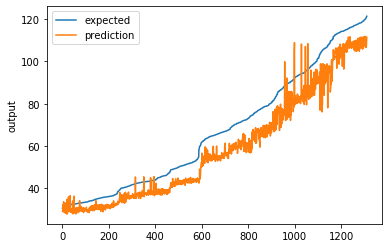

In [66]:


for i in range(2):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
    #model_lstm.add(LSTM(32, activation="relu"))
    #model_lstm.add(LSTM(16, activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm.hdf5')

model_lstm.summary()

pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),y_test,sort=True)